# External modules

In [248]:
library(tidyverse)
library(readr)
library(DescTools)

# Internal functions

In [249]:

path <- ".."

xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_nlargest_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/get_standard_scaled_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_and_standard_scaled_data.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_modes.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_modes.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/fit_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/fit_unimodal_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/fit_ns_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/fit_unimodal_ns_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_fit_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_fit_ns_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/get_ns_gev_model_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/get_full_ns_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/get_full_ns_gev_mixture_model_cdf.R"))


In [250]:
options(repr.plot.width=19, repr.plot.height=12)

# Complete dataset

In [251]:
data <- xfun::in_dir(dir = path, expr = read_csv("./applications/final_dataset.csv"))

Rows: 22847 Columns: 59
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (59): timestamp, latitude, longitude, velocity_latitude, velocity_longit...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [252]:
str(data)

spc_tbl_ [22,847 × 59] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ timestamp             : num [1:22847] 17207386 17241310 17274219 17308103 17343083 ...
 $ latitude              : num [1:22847] 48.8 48.8 48.8 48.8 48.8 ...
 $ longitude             : num [1:22847] 2.46 2.46 2.46 2.46 2.46 ...
 $ velocity_latitude     : num [1:22847] NA -4.91e-11 -3.82e-11 -3.73e-11 -4.86e-11 ...
 $ velocity_longitude    : num [1:22847] NA 9.48e-12 7.09e-12 6.72e-12 8.41e-12 ...
 $ velocity              : num [1:22847] NA 5.00e-11 3.89e-11 3.79e-11 4.93e-11 ...
 $ lateral_error         : num [1:22847] -0.589 -0.571 -0.566 -0.56 -0.592 ...
 $ longitudinal_error    : num [1:22847] 0.0639 0.0775 0.0832 0.0979 0.1043 ...
 $ haversine_error       : num [1:22847] 0.592 0.576 0.572 0.569 0.6 ...
 $ latitude_error        : num [1:22847] 4.91e-06 4.77e-06 4.73e-06 5.57e-06 4.96e-06 ...
 $ longitude_error       : num [1:22847] -1.22e-07 1.33e-07 2.49e-07 3.92e-07 5.62e-07 ...
 $ heading_error         : num [1:2284

# Impute outliers

In [253]:
x_raw <- data$lateral_error_abs

In [255]:
coefficient_iqr <- 9
method <- c("interpolate", "mode", "median", "mean")[1]

In [256]:
x_raw_object <- impute_outliers(x = x_raw, coefficient_iqr = coefficient_iqr, method = method)

In [257]:
print(names(x_raw_object))

[1] "outlier_values"      "outlier_positions"   "outlier_substitutes"
[4] "method"              "coefficient_iqr"     "imputed_data"       
[7] "raw_data"           


In [258]:
outlier_positions <- x_raw_object$outlier_positions

In [259]:
print(outlier_positions)

  [1]  2348  2349  2350  2351  2352  2353  2354  2355  2356  2357  2358  2359
 [13]  2360  2361  2362  2363  2364  2365  2366  2367  2368  2369  2370  2371
 [25]  2372  2373  2374  2375  2376  2377  2378  2379  2380  2381  2382  2383
 [37]  2384  2385  2386  2387  2388  2389  2390  2391  2392  2393  2394  2395
 [49]  2396  4811  4812  4813  4814  4815  4816  4817  4818  4819  4820  4821
 [61]  4822  4823  4824  4825  4826  4827  4828  4829 16605 16606 16607 16608
 [73] 16609 16610 16611 16612 16613 16614 16615 16616 16617 16618 16619 16620
 [85] 16621 16622 16623 16624 16625 16626 16627 16628 16629 16630 16631 16632
 [97] 16633 16634 16635 16636 16637 16638 16639 16640 16641 16642 16643 16644
[109] 16645 16646 16647 16648 16649 16650 16651 16652 16653 16654 16655 18392
[121] 18393 18394 18395 18396 18397 18398 18399 18400 18401 18402 18403 18404
[133] 18405 18406 18407 18408 18409 18410 18411 18412 18417 18418 18419 18420
[145] 18421 18422 18423 18424 18425 18426 18427 18428 18429 1843

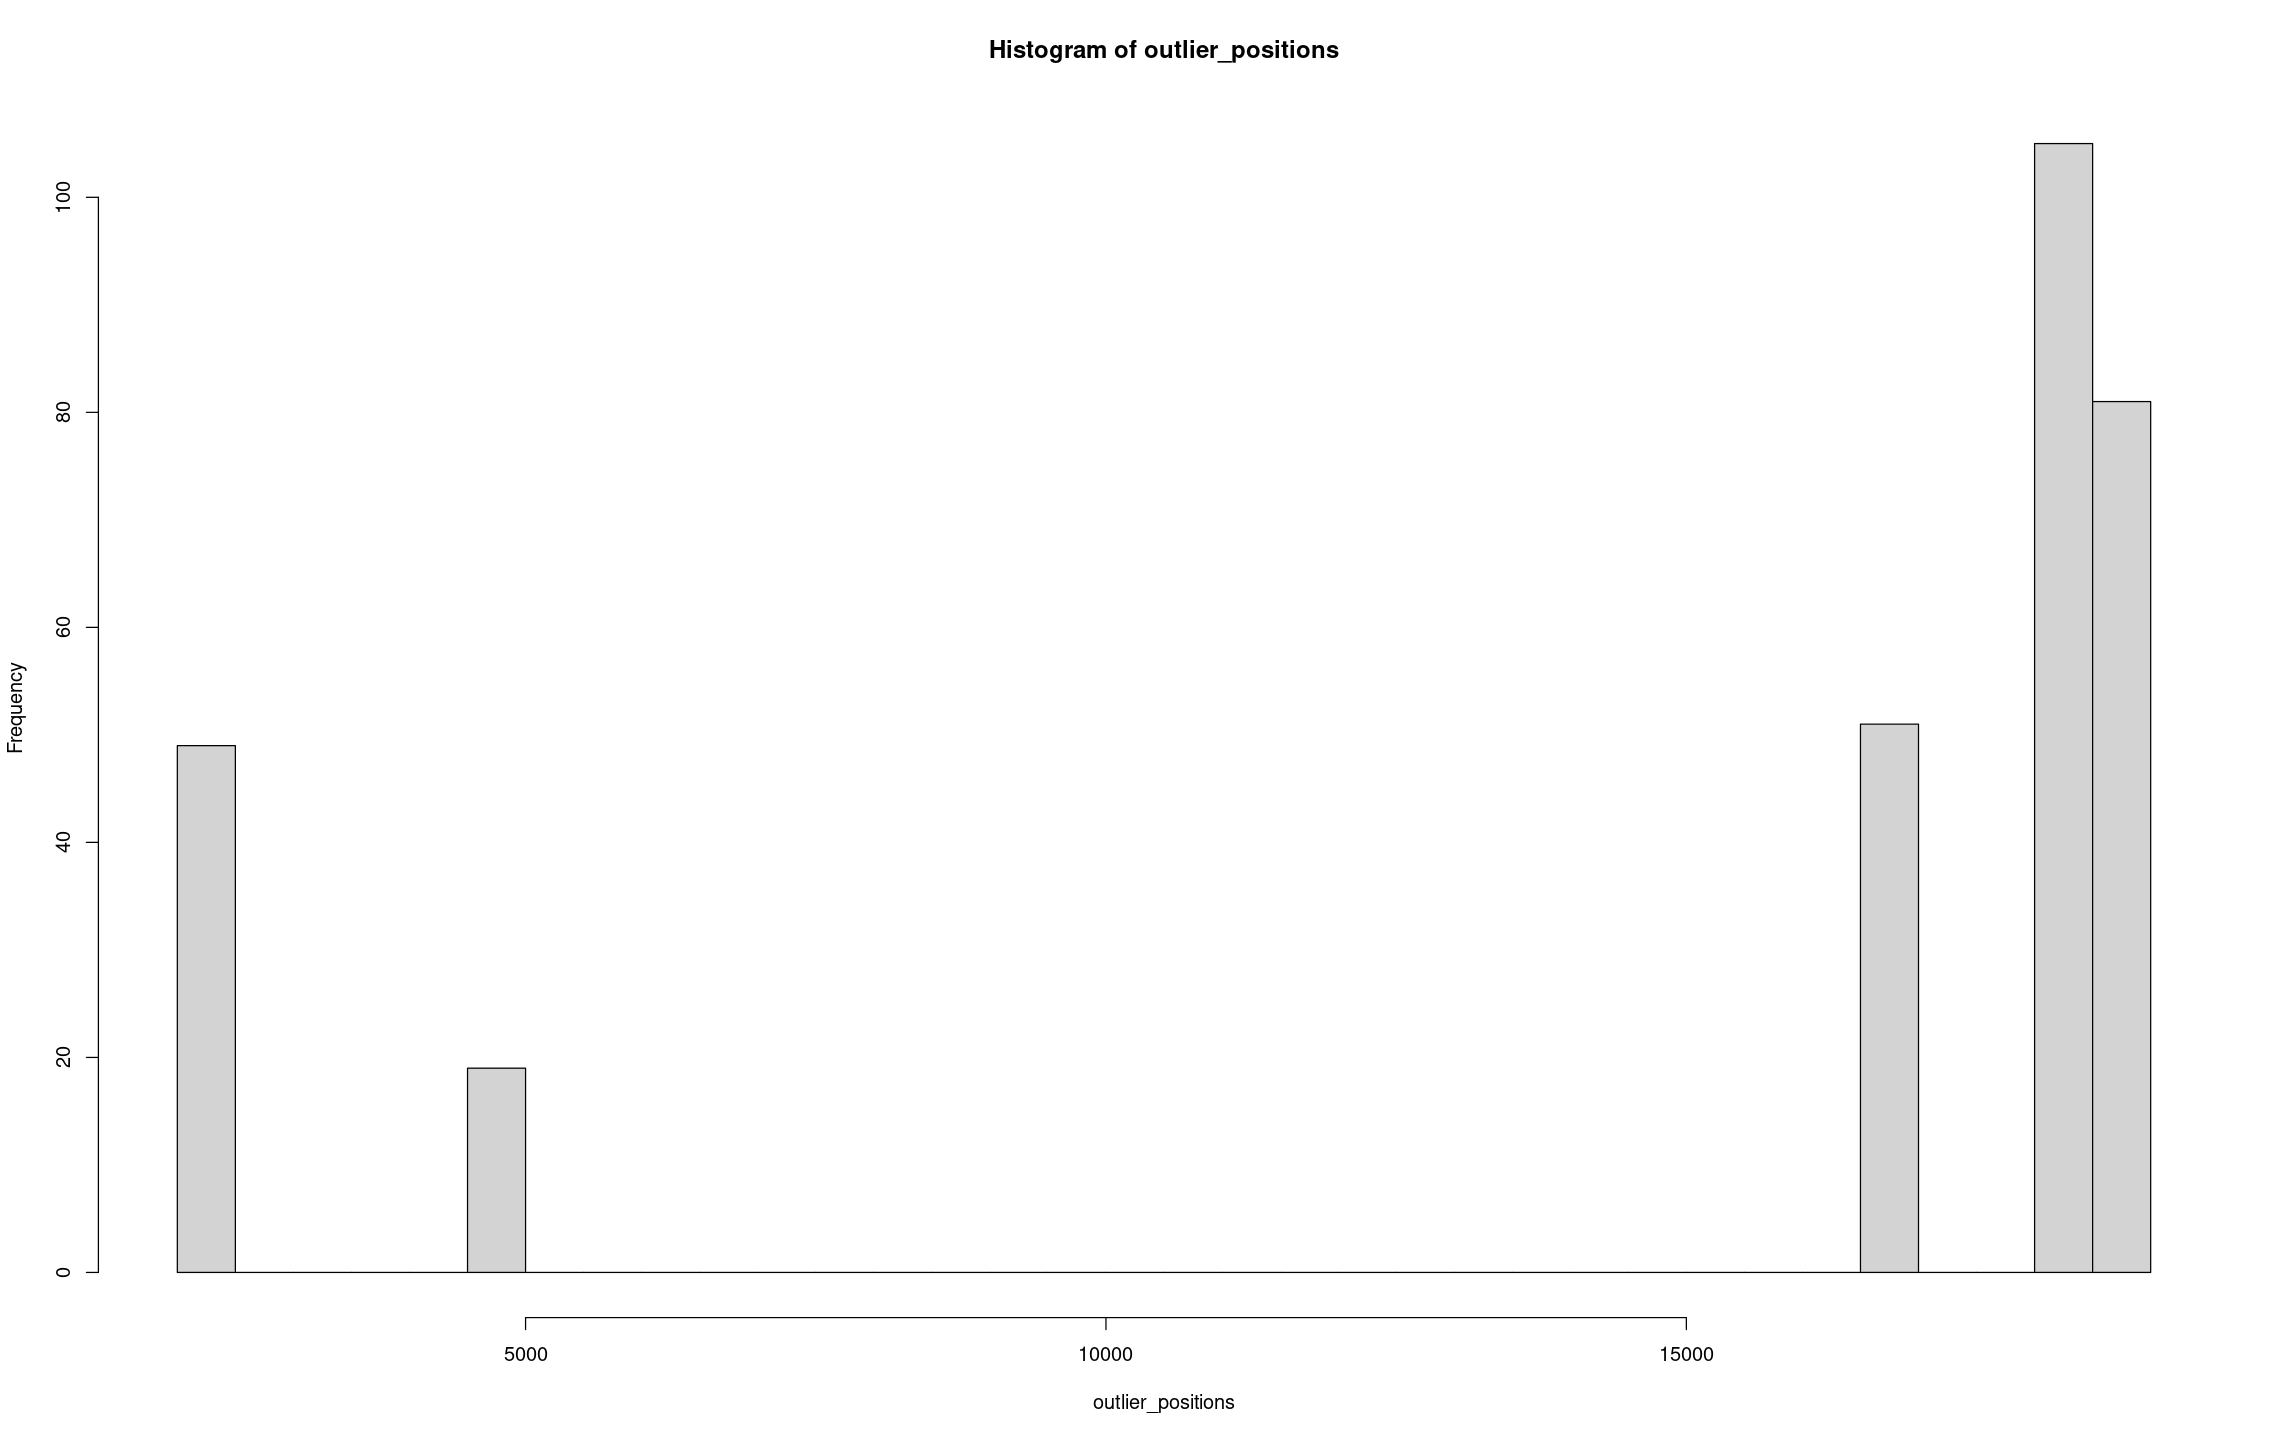

In [260]:
hist(outlier_positions, nclass = 50)

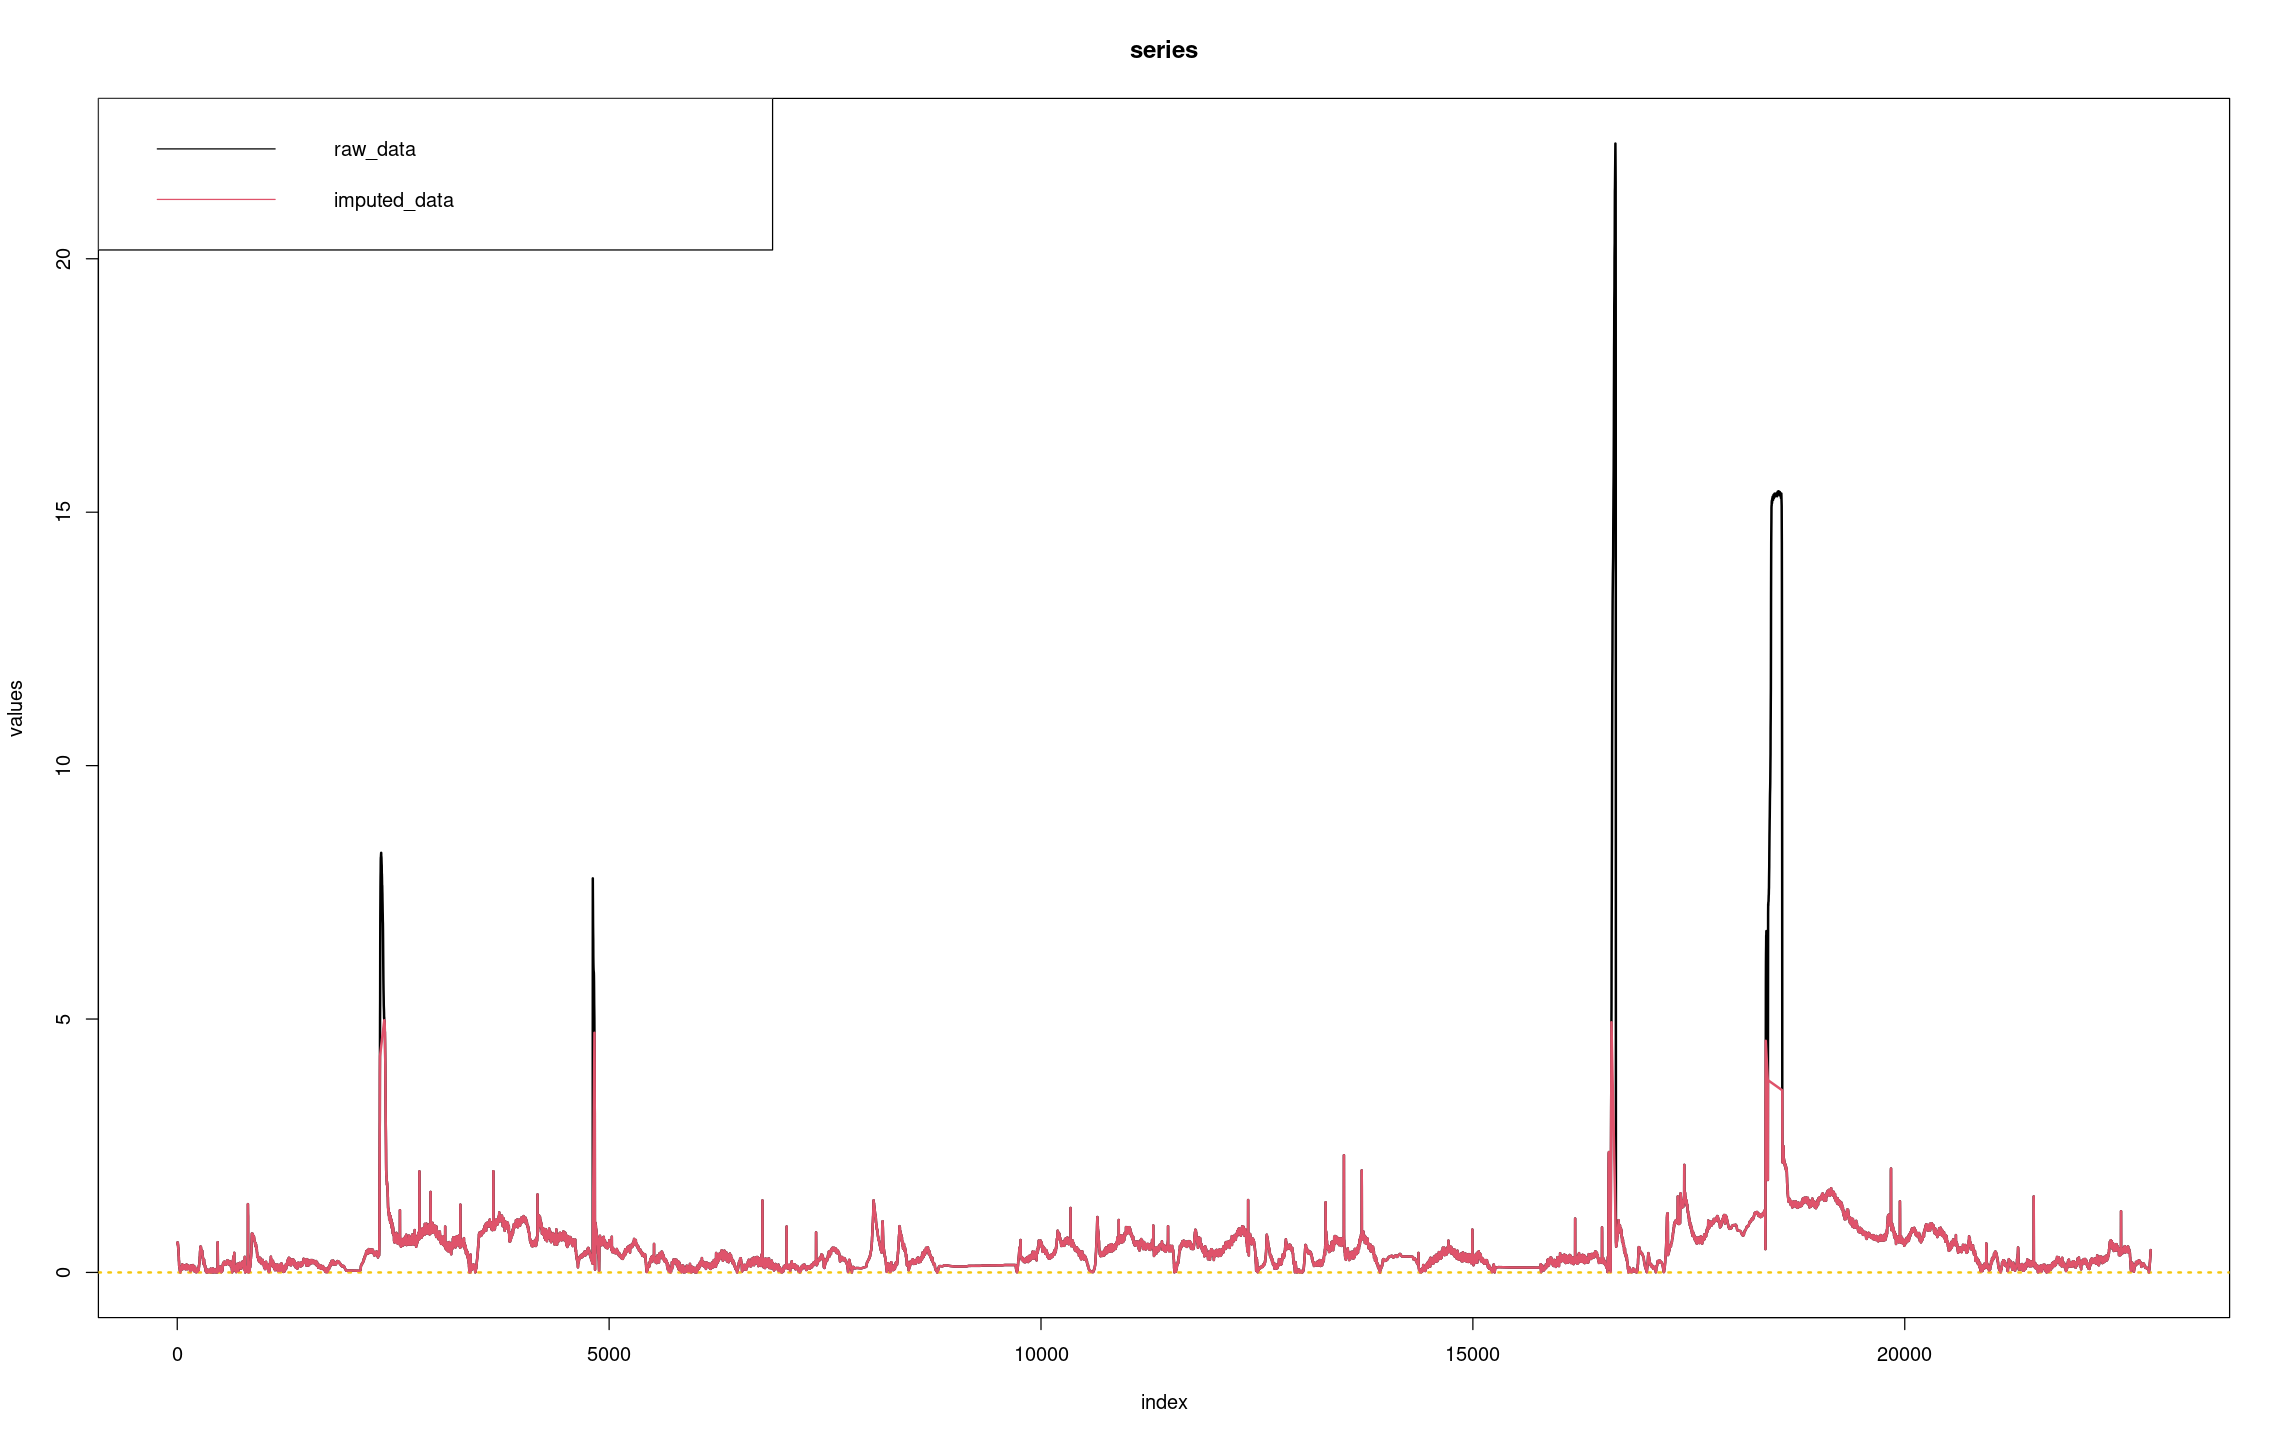

In [261]:
plot(x_raw_object$raw_data, 
     type = "l", 
     lwd = 2, 
     ylab = "values", 
     xlab = "index",
    main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)
lines(x_raw_object$imputed_data, col = 2, lwd = 2)
legend("topleft", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)

In [263]:
# data with imputed outliers
x_with_imputed_outliers <- x_raw_object$imputed_data 

In [265]:
# data with removed outliers
x_with_removed_outliers <- x_raw[-outlier_positions]
data_clean <- data[-outlier_positions, ]

# Data description

In [266]:
#x <- x_with_imputed_outliers
x <- x_with_removed_outliers

------------------------------------------------------------------------------ 
x (numeric)

           length                n              NAs           unique'
           22'542           22'542                0           22'276
                            100.0%             0.0%                 
                                                                    
              .05              .10              .25           median
  0.0473433287814  0.0867730751634  0.1438513360920  0.3188922554255
                                                                    
            range               sd            vcoef              mad
  4.9767084120450  0.3868125701650  0.8965798307649  0.3005103448301
                                                                    
               0s             mean            meanCI
                0  0.4314312645590   0.4263814460751
             0.0%                    0.4364810830429
                                                    
    

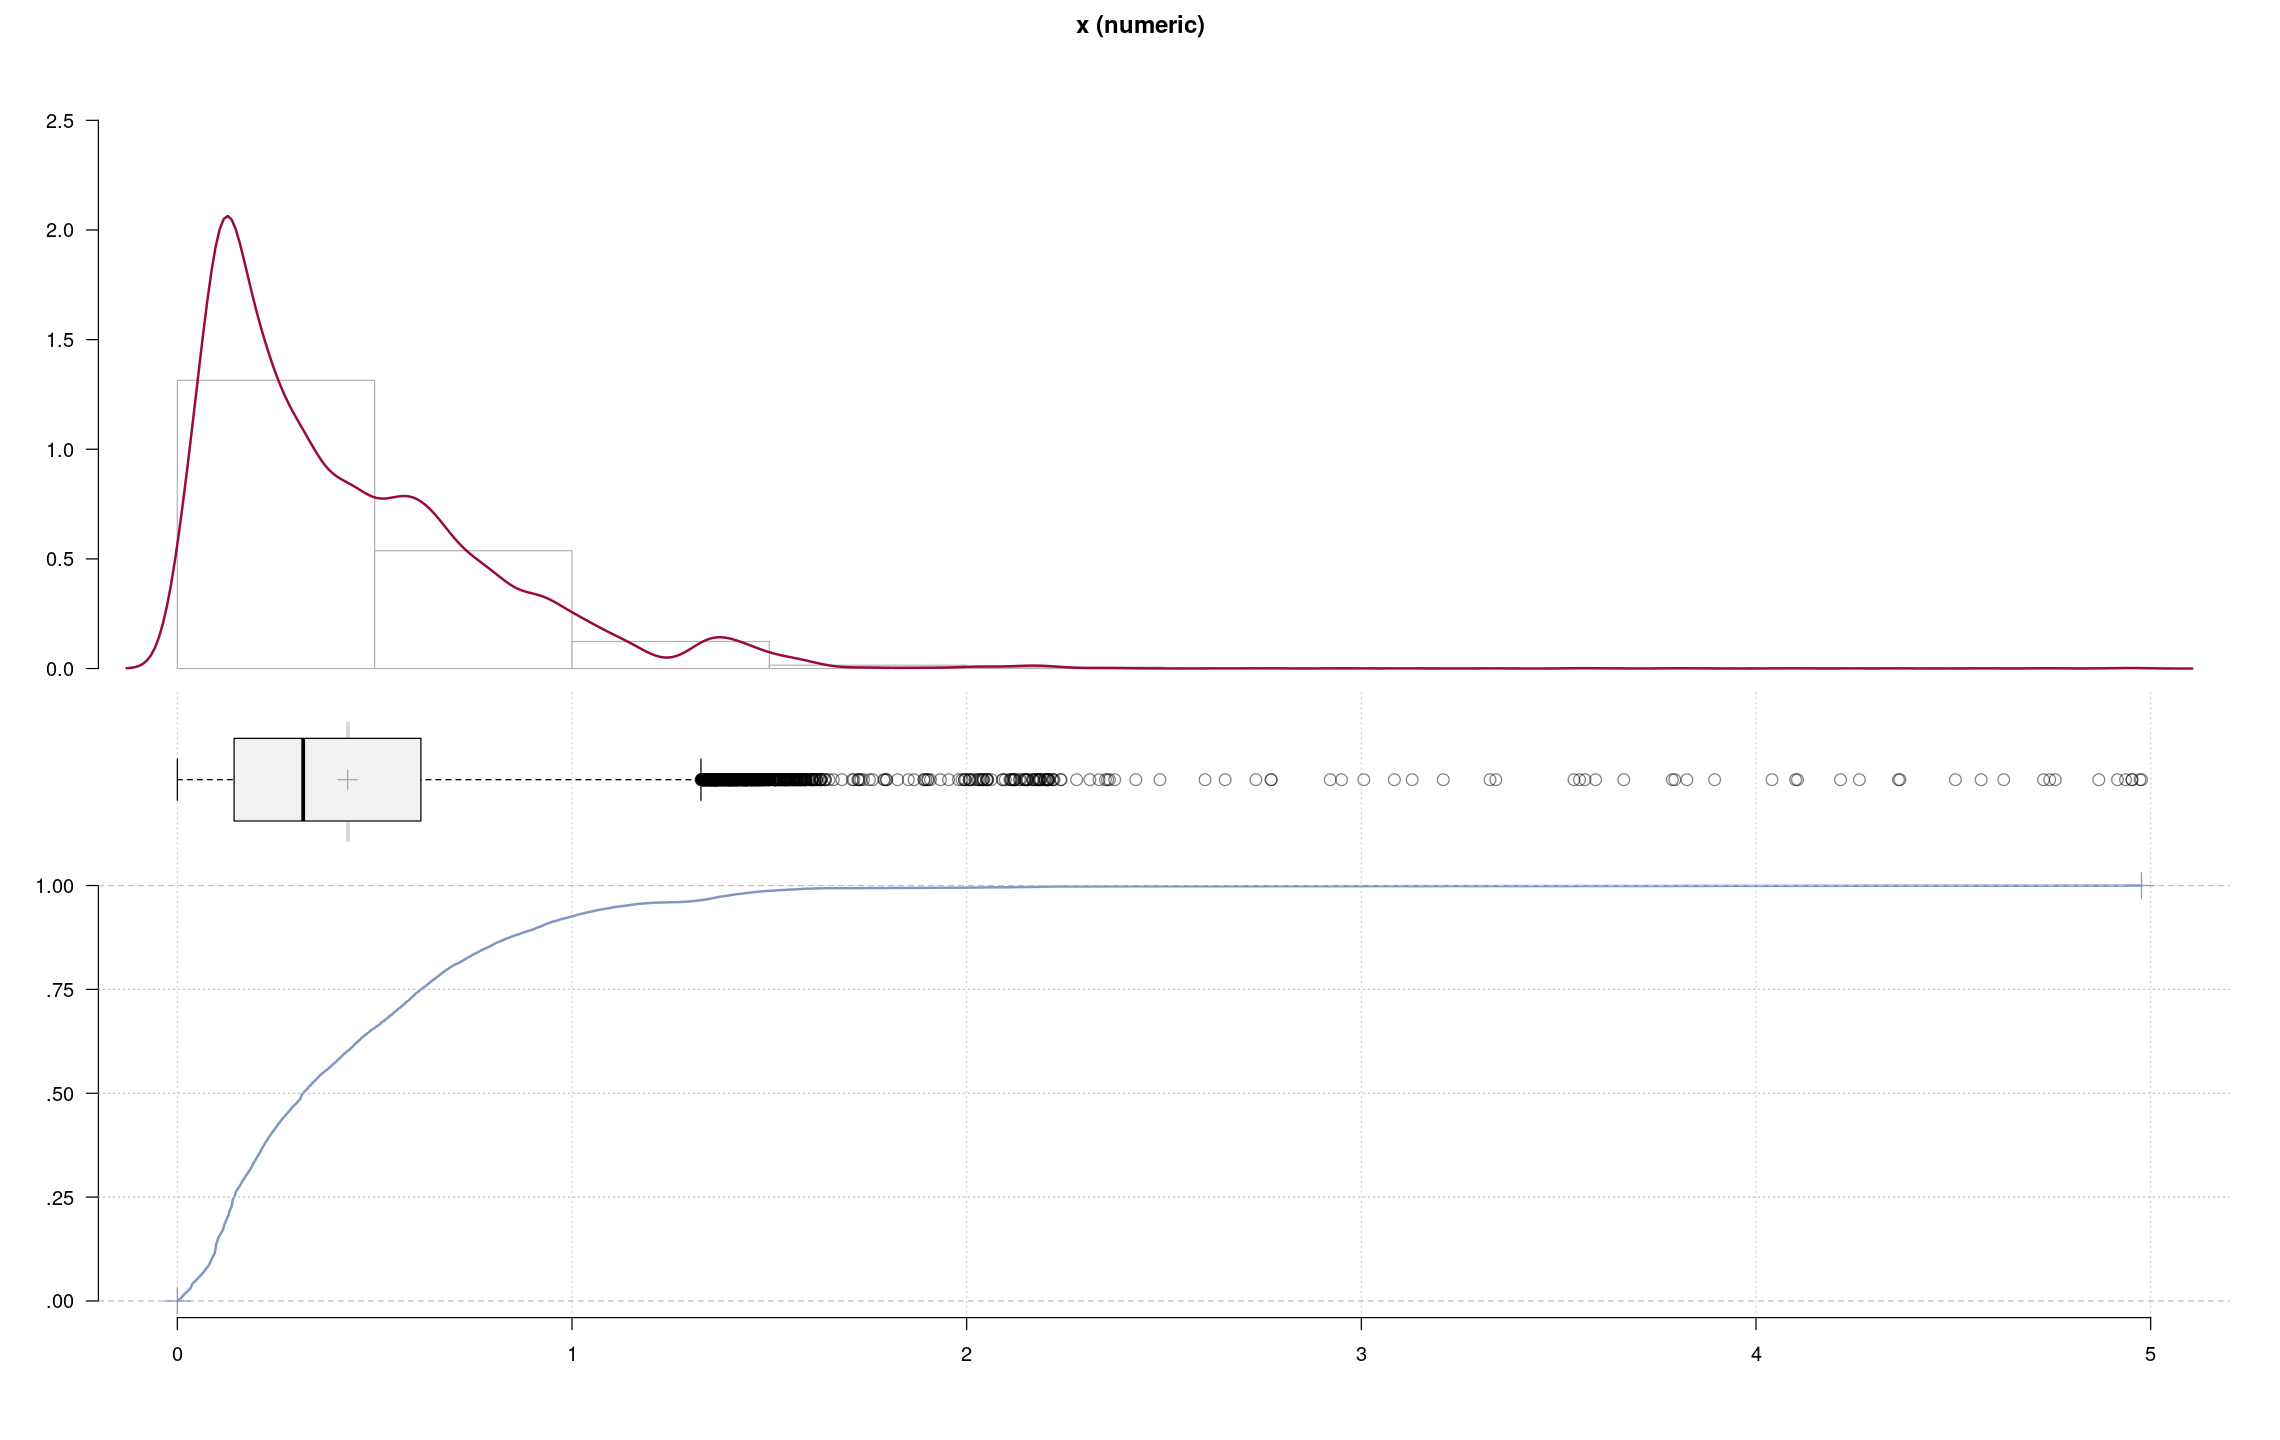

In [268]:
Desc(x)

In [269]:
#nlargest <- 2000
#y <- extract_nlargest_sample(x, n = nlargest)
#Desc(y)

# EVA: Stationary case

## Estimation

In [270]:
modes_object <- calculate_modes(x = x)

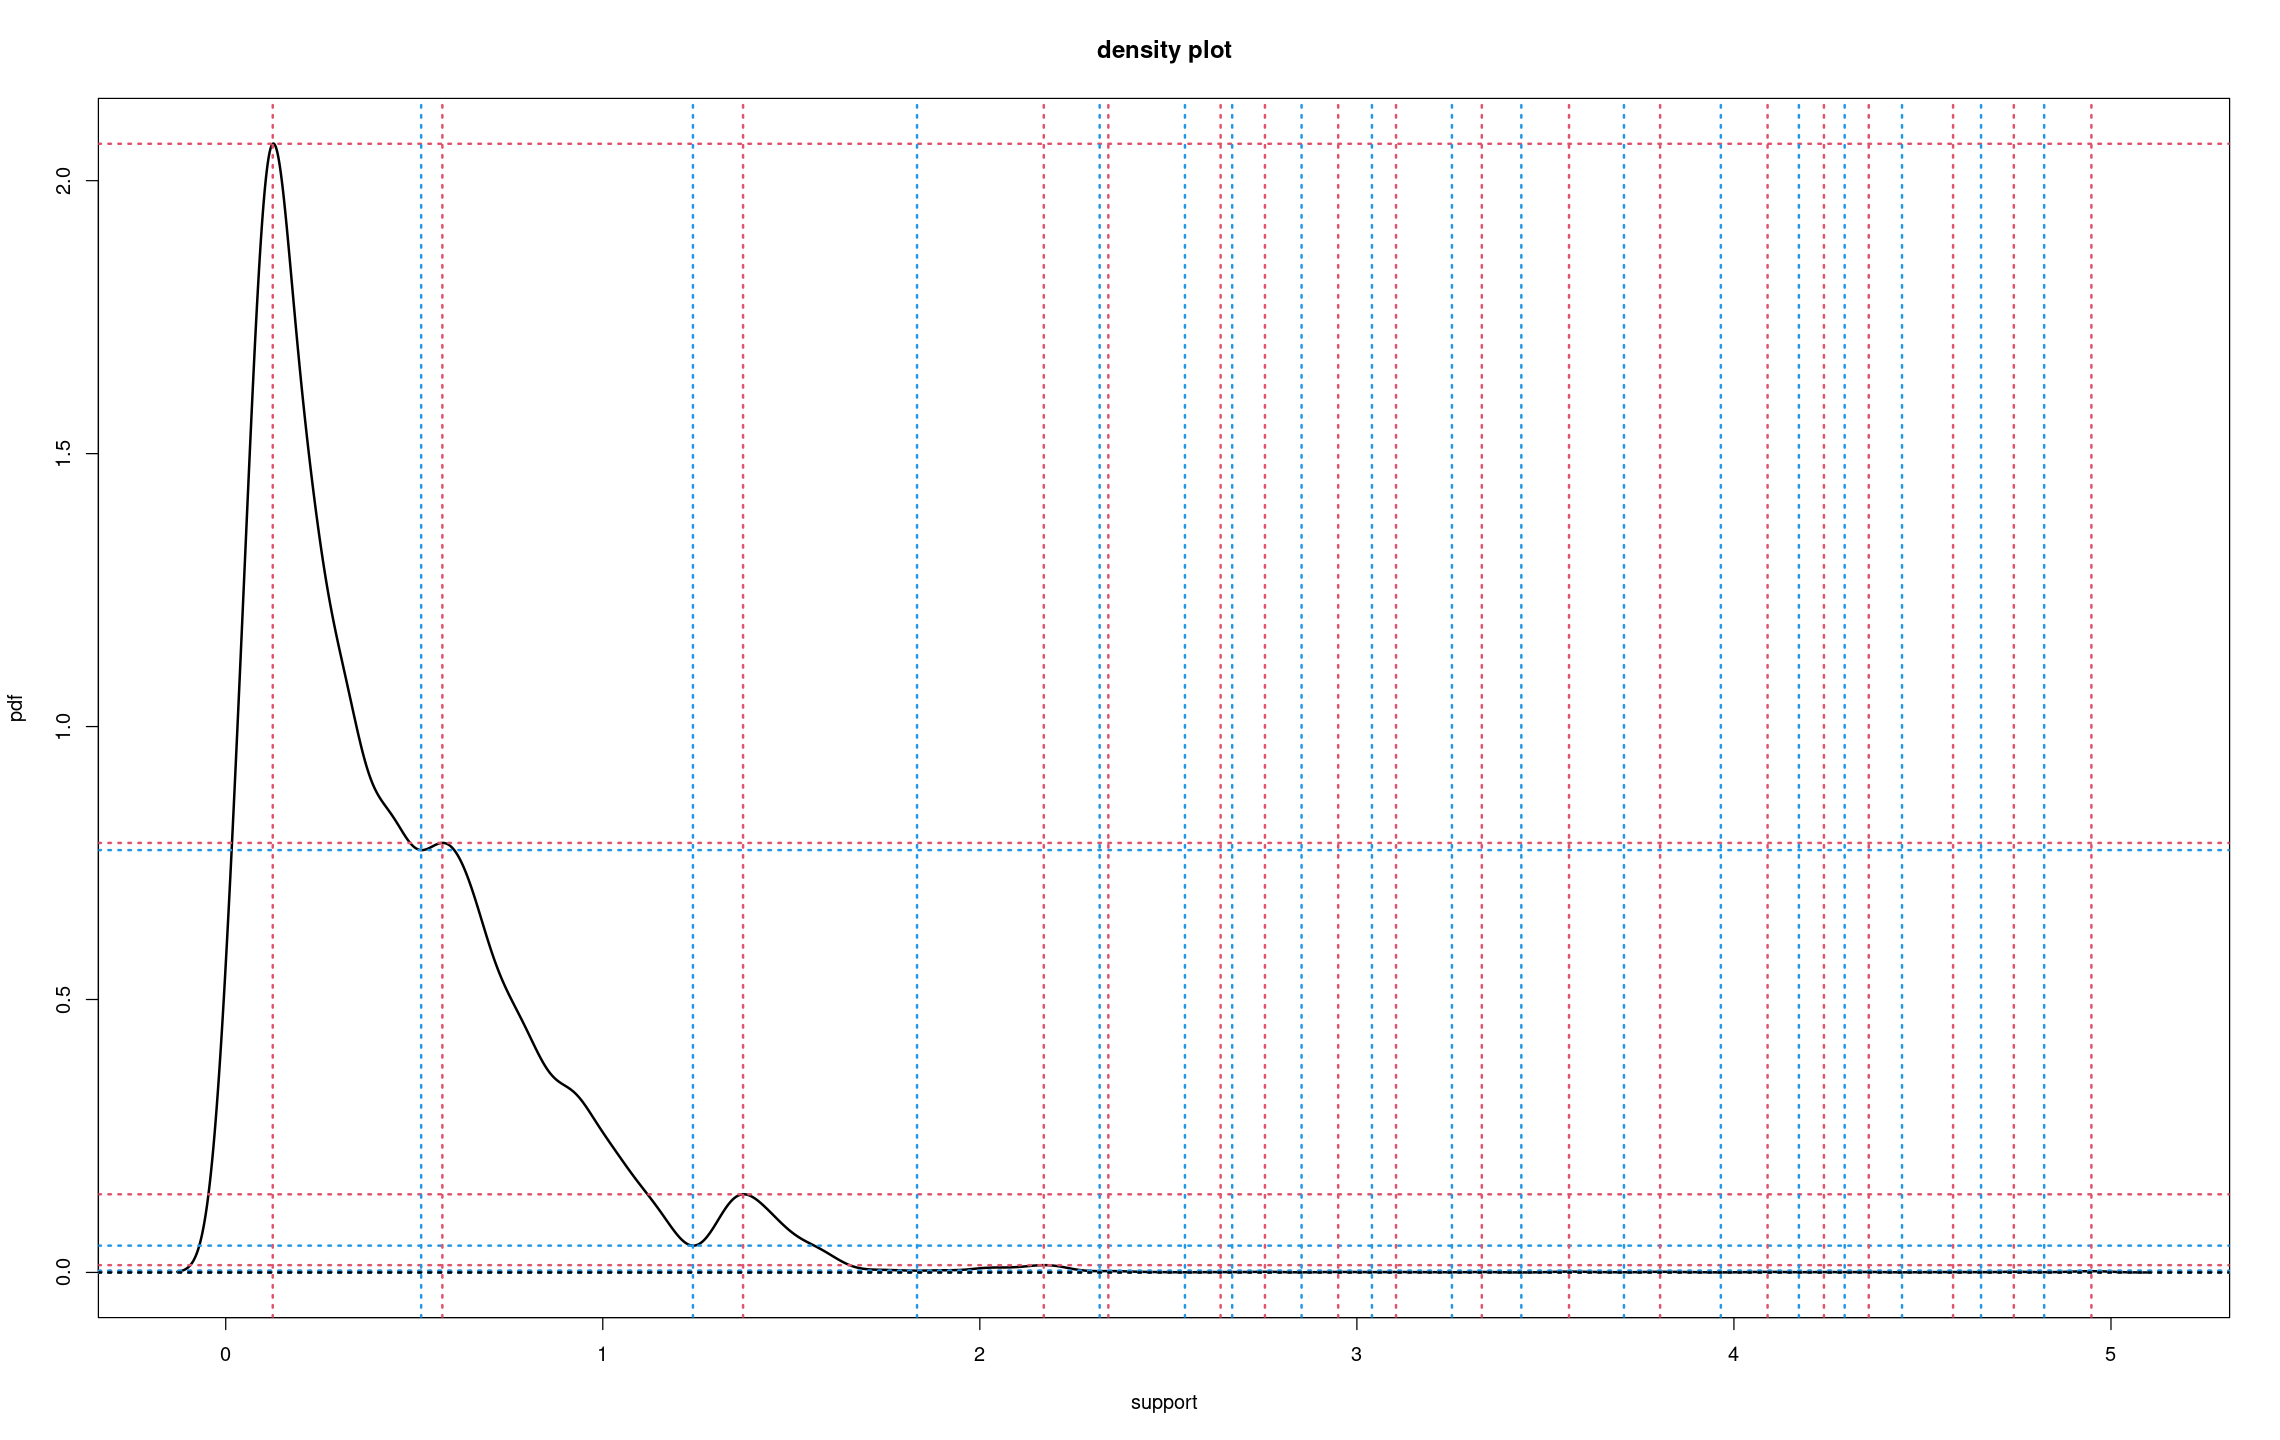

In [271]:
plot_modes(modes_object)

In [272]:
p <- 2

gev_mixture_model <- fit_gev_mixture_model(x = x,
                                 nb_gev_models = p,
                                 min_cluster_size = 20,
                                 max_iteration = 40,
                                 left_cluster_extension_size = 20,
                                 right_cluster_extension_size = 20,
                                 tolerance = 10^(-3))


[1] "Iteration: 2, Tolerance: 129.024072078311"
[1] "Iteration: 3, Tolerance: 100.440763010622"
[1] "Iteration: 4, Tolerance: 79.8627648817819"
[1] "Iteration: 5, Tolerance: 52.7611277310862"
[1] "Iteration: 6, Tolerance: 44.8756658029633"
[1] "Iteration: 7, Tolerance: 51.995844400426"
[1] "Iteration: 8, Tolerance: 53.2712631029863"
[1] "Iteration: 9, Tolerance: 45.6871325208303"
[1] "Iteration: 10, Tolerance: 38.6298270076877"
[1] "Iteration: 11, Tolerance: 42.0932392451141"
[1] "Iteration: 12, Tolerance: 38.9962854790556"
[1] "Iteration: 13, Tolerance: 42.8751603043183"
[1] "Iteration: 14, Tolerance: 47.7213618711976"
[1] "Iteration: 15, Tolerance: 58.8130167864856"
[1] "Iteration: 16, Tolerance: 53.6723172775546"
[1] "Iteration: 17, Tolerance: 61.9912966996144"
[1] "Iteration: 18, Tolerance: 61.659968830194"
[1] "Iteration: 19, Tolerance: 64.4553879908362"
[1] "Iteration: 20, Tolerance: 56.9543757026495"
[1] "Iteration: 21, Tolerance: 46.9732629603604"
[1] "Iteration: 22, Tolerance:

In [273]:
print(names(gev_mixture_model))

 [1] "last_iteration"                  "last_tolerance"                 
 [3] "nclusters"                       "cluster_sizes"                  
 [5] "cluster_weights"                 "cluster_negative_loglikelihoods"
 [7] "information_criterions"          "cluster_gev_model_parameters"   
 [9] "clusters"                        "data"                           
[11] "cluster_models"                 


## Parameters

In [275]:
print(gev_mixture_model$nclusters)

[1] 2


In [276]:
print(gev_mixture_model$cluster_sizes)

    1     2 
12424 10118 


In [277]:
print(gev_mixture_model$information_criterions)

         AIC          BIC 
-22709.74667 -22661.60785 


In [278]:
print(gev_mixture_model$cluster_gev_model_parameters)

                   [,1]         [,2]
location  0.13658269721 0.5697120097
scale     0.08784206587 0.1798337529
shape    -0.19149777952 0.3294417103


In [280]:
print(gev_mixture_model$cluster_weights)

[1] 0.5511489664 0.4488510336


## Diagnostic

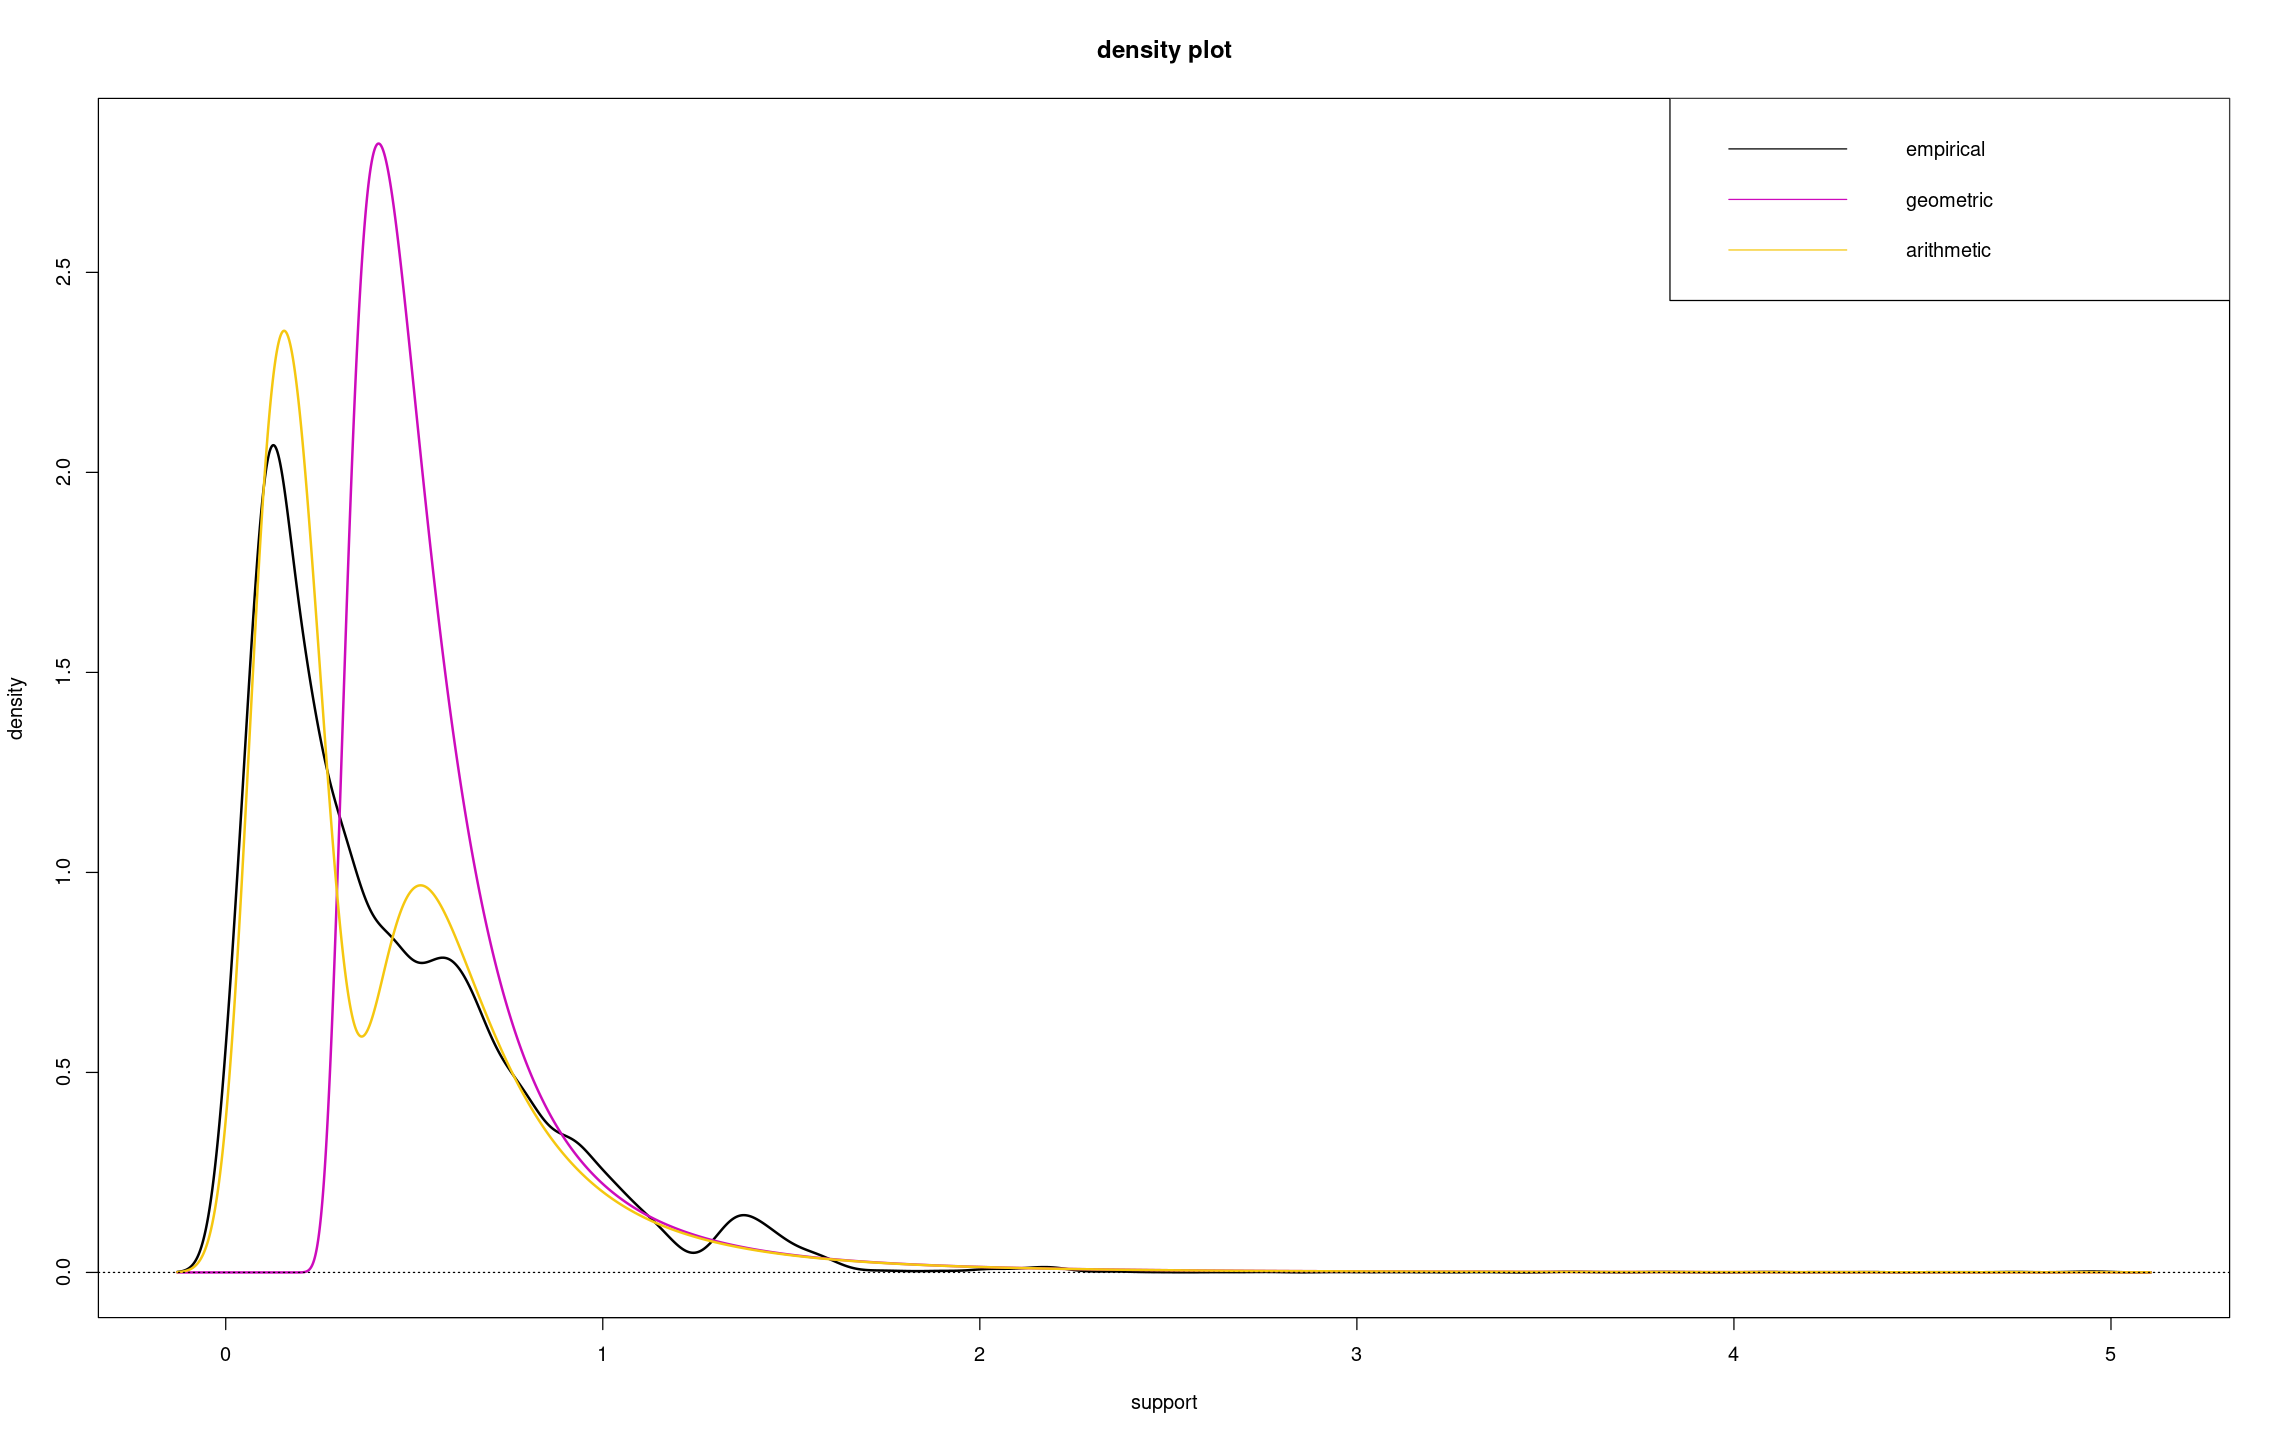

In [281]:
plot_fit_gev_mixture_model(gev_mixture_model)

## Quantiles

In [283]:
parameters <- gev_mixture_model$cluster_gev_model_parameters

weights <- gev_mixture_model$cluster_weights

In [97]:
alpha <- 10^(-14)

In [285]:
alpha <- 1/(22542*1)

In [286]:
rl_geometric <- calculate_gev_mixture_model_inverse_cdf(p = 1 - alpha,
                                                   locations = parameters["location", ],
                                                   scales = parameters["scale", ],
                                                   shapes = parameters["shape", ],
                                                   weights = weights,
                                                   iterations = 100,
                                                   kind = c("geometric", "arithmetic")[1])

print(rl_geometric)

[1] 11.41412533


In [288]:
rl_arithmetic <- calculate_gev_mixture_model_inverse_cdf(p = 1 - alpha,
                                                   locations = parameters["location", ],
                                                   scales = parameters["scale", ],
                                                   shapes = parameters["shape", ],
                                                   weights = weights,
                                                   iterations = 100,
                                                   kind = c("geometric", "arithmetic")[2])

print(rl_arithmetic)

[1] 11.41402312


# EVA: Non-stationary case

In [23]:
print(names(data))

 [1] "timestamp"              "latitude"               "longitude"             
 [4] "velocity_latitude"      "velocity_longitude"     "velocity"              
 [7] "lateral_error"          "longitudinal_error"     "haversine_error"       
[10] "latitude_error"         "longitude_error"        "heading_error"         
[13] "lateral_error_abs"      "longitudinal_error_abs" "haversine_error_abs"   
[16] "latitude_error_abs"     "longitude_error_abs"    "heading_error_abs"     
[19] "area"                   "object"                 "name_airplane"         
[22] "name_bench"             "name_bench..group."     "name_bicycle"          
[25] "name_bird"              "name_bird..group."      "name_boat"             
[28] "name_bus"               "name_car"               "name_car..group."      
[31] "name_dog"               "name_electric.pole"     "name_fence"            
[34] "name_fire.hydrant"      "name_gas.station"       "name_helicopter"       
[37] "name_house"             "name_hous

In [66]:
data_covariates <- data %>% select(velocity_latitude, velocity_longitude, velocity, area, object)
data_covariates <- na.omit(data_covariates)

In [290]:
data_covariates <- data_clean %>% select(velocity_latitude, velocity_longitude, velocity, area, object)
data_covariates <- na.omit(data_covariates)

In [293]:
tail(data_covariates)

velocity_latitude,velocity_longitude,velocity,area,object
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-1.940983719e-12,7.435616186e-13,2.078533541e-12,0.5983367151,17
-1.363411577e-12,5.330692871e-13,1.463917345e-12,0.5661612699,18
-1.173312364e-12,4.772723125e-13,1.266669161e-12,0.6322046775,20
-1.267666481e-12,5.446311827e-13,1.379710634e-12,0.6057293744,20
-6.827273381e-13,3.380506526e-13,7.618365060e-13,0.6087681255,20
-4.829062301e-13,3.187162538e-13,5.786004473e-13,0.5587587651,20


In [291]:
data_covariates_scaled <- get_standard_scaled_data(data_covariates, newdata = NULL)

In [294]:
tail(data_covariates_scaled)

,velocity_latitude,velocity_longitude,velocity,area,object
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22536,-0.041995691003,0.013863961170,-1.584760725,-0.9621822143,-1.475483021
22537,-0.028950826673,0.011107717471,-1.598073884,-1.0593990457,-1.386480857
22538,-0.024657305121,0.010377096746,-1.602346463,-0.8598515090,-1.208476528
22539,-0.026788357788,0.011259112069,-1.599897879,-0.9398455871,-1.208476528
22540,-0.013577104675,0.008554090558,-1.613281608,-0.9306641213,-1.208476528
22541,-0.009064007431,0.008300920694,-1.617250671,-1.0817654202,-1.208476528


In [224]:
#Desc(data_covariates_scaled$velocity_latitude)

In [101]:
#Desc(data_covariates_scaled$velocity_longitude)

In [102]:
#Desc(data_covariates_scaled$velocity)

In [103]:
#Desc(data_covariates_scaled$area)

In [104]:
#Desc(data_covariates_scaled$object)

## Estimation

In [295]:
print(names(data_covariates_scaled))

[1] "velocity_latitude"  "velocity_longitude" "velocity"          
[4] "area"               "object"            


In [405]:

p <- 2

ns_gev_model <- fit_ns_gev_mixture_model(x = x[-1],
                                    data = data_covariates_scaled,
                                    location.fun = ~ 1,
                                    scale.fun = ~ object,
                                    shape.fun = ~ 1,
                                    use.phi = TRUE,
                                    nb_gev_models = p,
                                    min_cluster_size = 20,
                                    max_iteration = 50,
                                    tolerance = 10^(-3),
                                    left_cluster_extension_size = 20,
                                    right_cluster_extension_size = 20)


[1] "Iteration: 2, Tolerance: 115.833206941365"
[1] "Iteration: 3, Tolerance: 109.842110085166"
[1] "Iteration: 4, Tolerance: 86.9539787090398"
[1] "Iteration: 5, Tolerance: 83.6014605324544"
[1] "Iteration: 6, Tolerance: 68.1877716089348"
[1] "Iteration: 7, Tolerance: 55.1193156761419"
[1] "Iteration: 8, Tolerance: 47.946058063244"
[1] "Iteration: 9, Tolerance: 47.0721825542932"
[1] "Iteration: 10, Tolerance: 43.4874481866518"
[1] "Iteration: 11, Tolerance: 43.7126083422536"
[1] "Iteration: 12, Tolerance: 35.7789353023527"
[1] "Iteration: 13, Tolerance: 35.1876385201431"
[1] "Iteration: 14, Tolerance: 42.1649471428627"
[1] "Iteration: 15, Tolerance: 52.2113700204809"
[1] "Iteration: 16, Tolerance: 47.277757625081"
[1] "Iteration: 17, Tolerance: 50.5726426174278"
[1] "Iteration: 18, Tolerance: 45.1765691648488"
[1] "Iteration: 19, Tolerance: 43.8182113226503"
[1] "Iteration: 20, Tolerance: 49.2105632872899"
[1] "Iteration: 21, Tolerance: 51.0717988998422"
[1] "Iteration: 22, Tolerance:

In [372]:
print(names(ns_gev_model))

 [1] "last_iteration"                  "last_tolerance"                 
 [3] "left_cluster_extension_size"     "right_cluster_extension_size"   
 [5] "nclusters"                       "cluster_sizes"                  
 [7] "cluster_weights"                 "cluster_negative_loglikelihoods"
 [9] "information_criterions"          "cluster_gev_model_coefficients" 
[11] "cluster_gev_model_parameters"    "cluster_gev_model_observations" 
[13] "cluster_gev_model_covariates"    "clusters"                       
[15] "data"                            "covariates"                     
[17] "cluster_residuals_data"          "cluster_residuals_models"       
[19] "cluster_residuals_diagnostics"   "cluster_models"                 


In [373]:
print(ns_gev_model$nclusters)

[1] 2


In [374]:
print(ns_gev_model$cluster_gev_model_coefficients)

                 [,1]           [,2]
mu0    0.135611828216  0.55536486155
mu1   -0.009683388761 -0.03155724282
scale  0.085449047547  0.17953713076
shape -0.207315884686  0.31633084289


In [375]:
print(ns_gev_model$information_criterions)

         AIC          BIC 
-23162.87774 -23098.69301 


In [376]:
print(ns_gev_model$cluster_sizes)

    1     2 
12110 10431 


In [377]:
print(ns_gev_model$cluster_weights)

[1] 0.5372432456 0.4627567544


In [378]:
cluster_models <- ns_gev_model$cluster_models
print(cluster_models)

[[1]]

extRemes::fevd(x = y, data = df, location.fun = location.fun, 
    scale.fun = scale.fun, shape.fun = shape.fun, use.phi = use.phi, 
    type = "GEV", method = "MLE")

[1] "Estimation Method used: MLE"


 Negative Log-Likelihood Value:  -12003.95602 


 Estimated parameters:
            mu0             mu1           scale           shape 
 0.135611828216 -0.009683388761  0.085449047547 -0.207315884686 

 Standard Error Estimates:
            mu0             mu1           scale           shape 
0.0009301067478 0.0008003834968 0.0006802660509 0.0090261363721 

 Estimated parameter covariance matrix.
                   mu0              mu1            scale            shape
mu0    8.650985624e-07 -1.740314733e-07  1.664365558e-07 -4.233253379e-06
mu1   -1.740314733e-07  6.406137420e-07 -8.930520568e-08  1.867909557e-06
scale  1.664365558e-07 -8.930520568e-08  4.627619000e-07 -3.814581563e-06
shape -4.233253379e-06  1.867909557e-06 -3.814581563e-06  8.147113781e-05

 AIC = -23999.912

In [379]:
coefficient_ci <- lapply(cluster_models, function(model){
    extRemes::ci.fevd(x = model, alpha = 0.05, type = "parameter")
})

print(coefficient_ci)

[[1]]
extRemes::fevd(x = y, data = df, location.fun = location.fun, 
    scale.fun = scale.fun, shape.fun = shape.fun, use.phi = use.phi, 
    type = "GEV", method = "MLE")

[1] "Normal Approx."

        95% lower CI        Estimate    95% upper CI
mu0    0.13378885249  0.135611828216  0.137434803943
mu1   -0.01125211159 -0.009683388761 -0.008114665933
scale  0.08411575059  0.085449047547  0.086782344506
shape -0.22500678690 -0.207315884686 -0.189624982477


[[2]]
extRemes::fevd(x = y, data = df, location.fun = location.fun, 
    scale.fun = scale.fun, shape.fun = shape.fun, use.phi = use.phi, 
    type = "GEV", method = "MLE")

[1] "Normal Approx."

        95% lower CI       Estimate   95% upper CI
mu0    0.55128176223  0.55536486155  0.55944796087
mu1   -0.03407126692 -0.03155724282 -0.02904321872
scale  0.17602027910  0.17953713076  0.18305398243
shape  0.29538731052  0.31633084289  0.33727437525




## Diagnostic

In [380]:
print(ns_gev_model$cluster_residuals_diagnostics)

[[1]]
extRemes::fevd(x = residuals, type = "GEV", method = "MLE")

[1] "Normal Approx."

           95% lower CI       Estimate    95% upper CI
location -0.04703636600 -0.02647245750 -0.005908548994
scale     0.96385003310  0.97951779927  0.995185565444
shape     0.03226559697  0.04999282688  0.067720056787


[[2]]
extRemes::fevd(x = residuals, type = "GEV", method = "MLE")

[1] "Normal Approx."

            95% lower CI       Estimate   95% upper CI
location -0.006722448822  0.01537274769  0.03746794421
scale     0.993859736706  1.01010886035  1.02635798400
shape    -0.043555044005 -0.02815672430 -0.01275840459




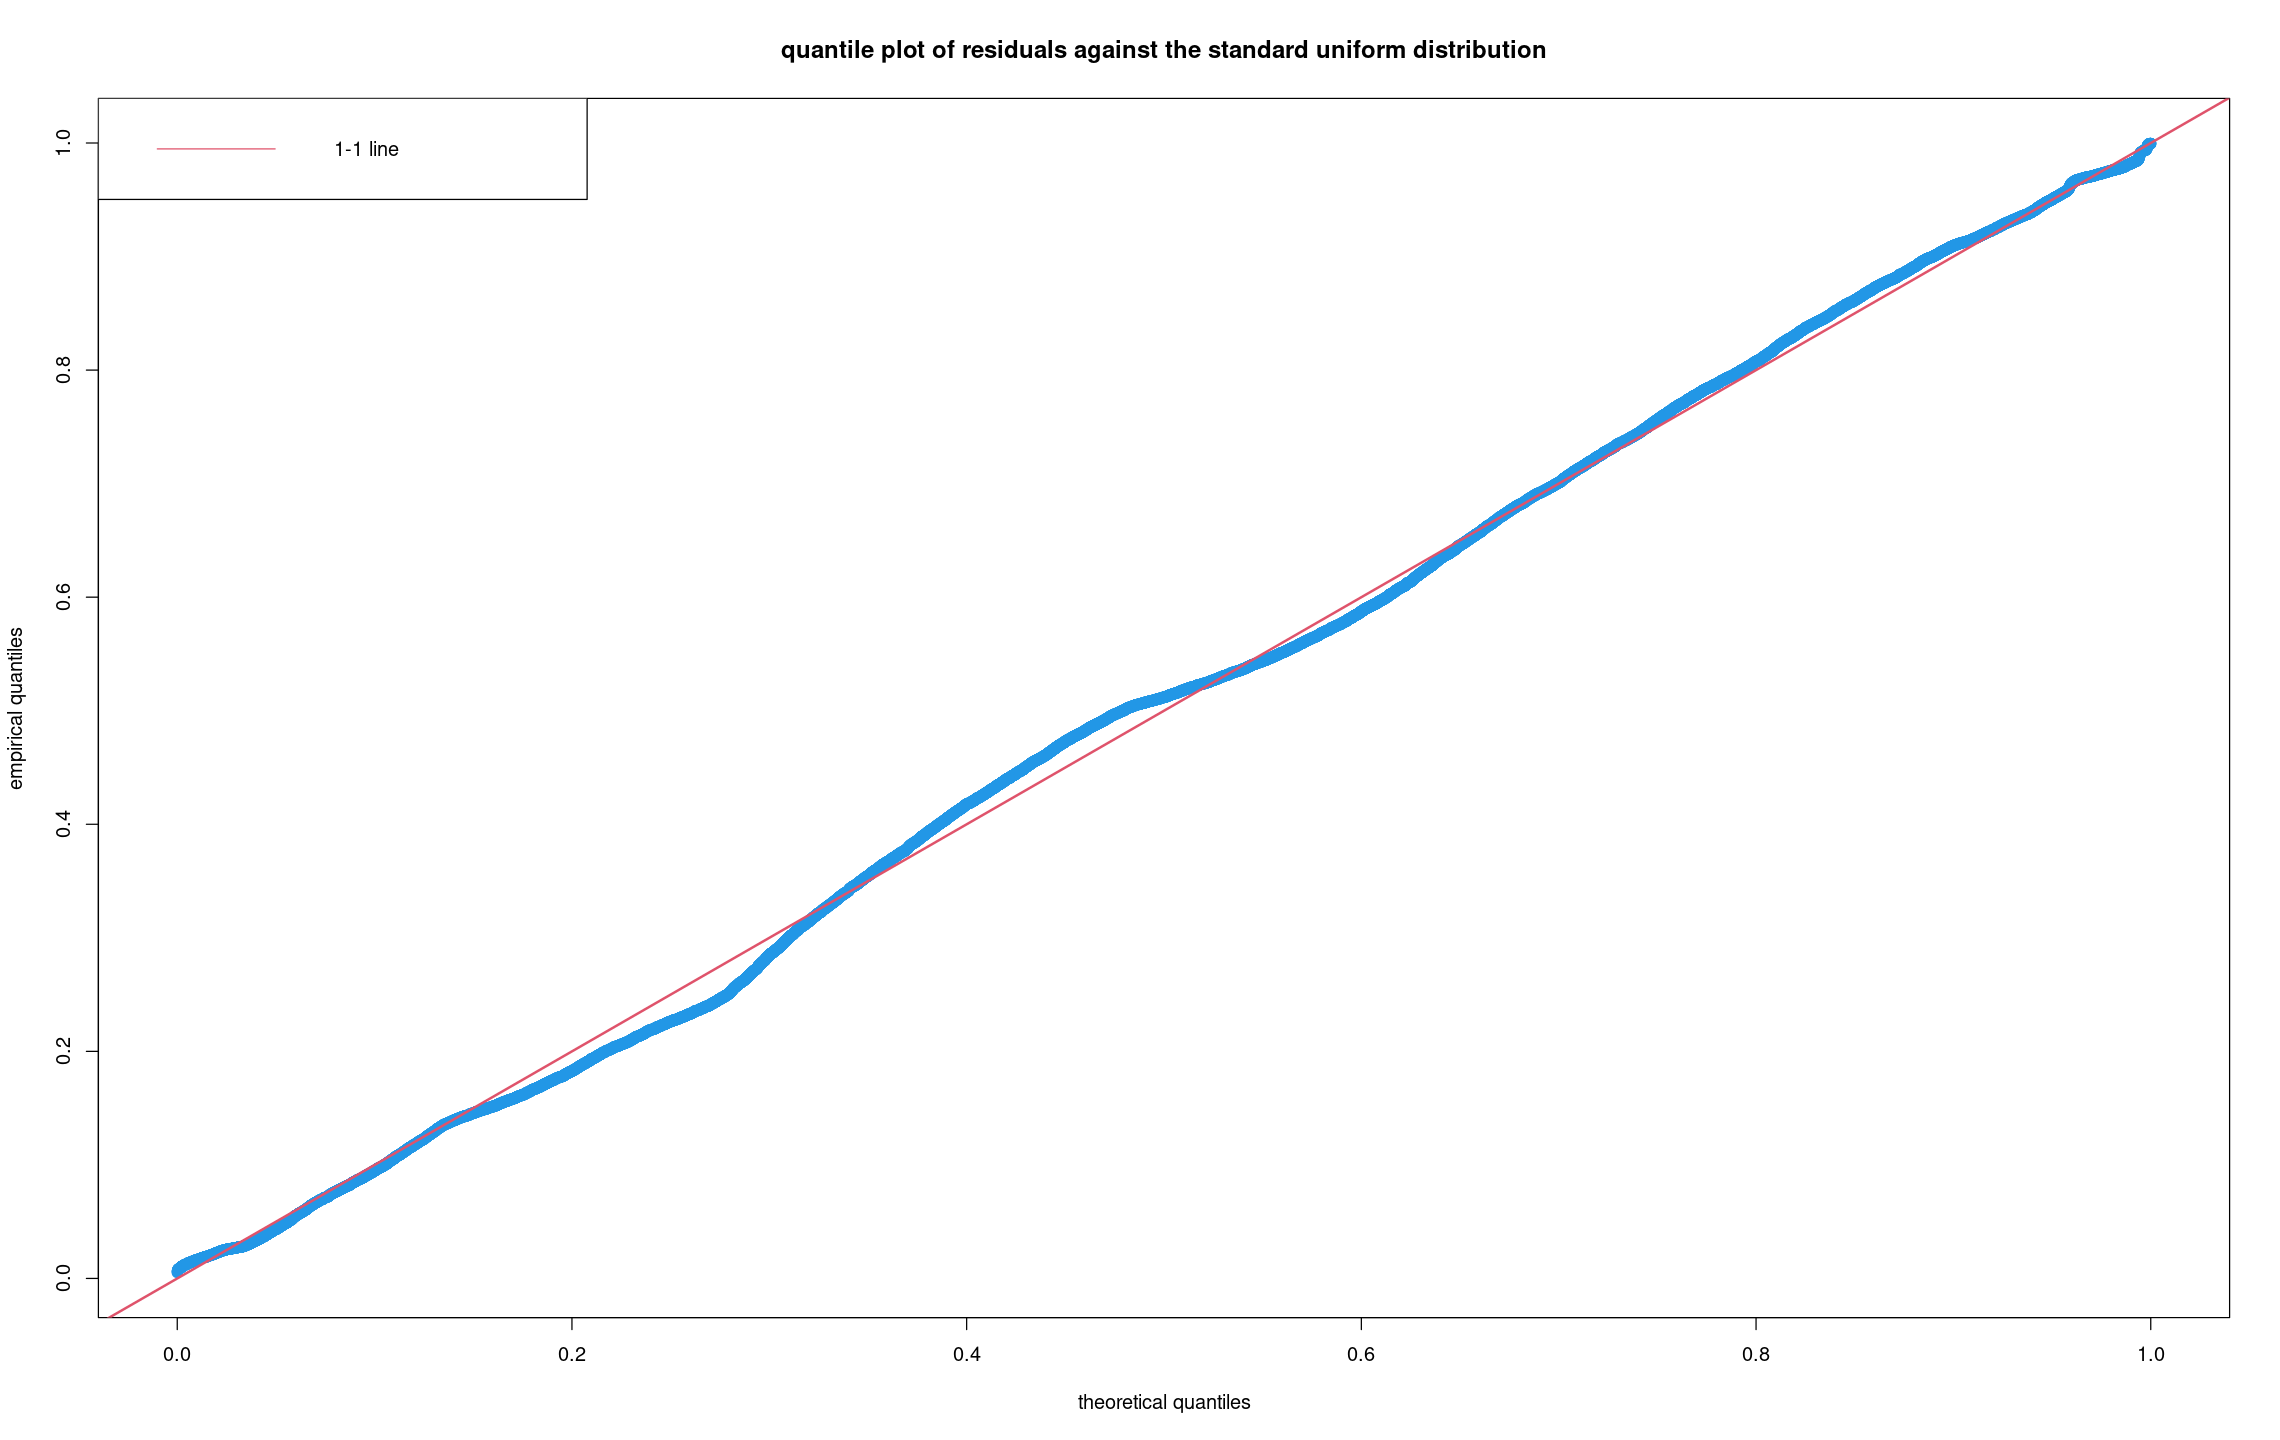

In [381]:
plot_fit_ns_gev_mixture_model(ns_gev_model, log_scale = FALSE)

In [382]:
ns_cdf <- get_full_ns_gev_mixture_model_cdf(ns_gev_model, kind = c("geometric", "arithmetic")[2])

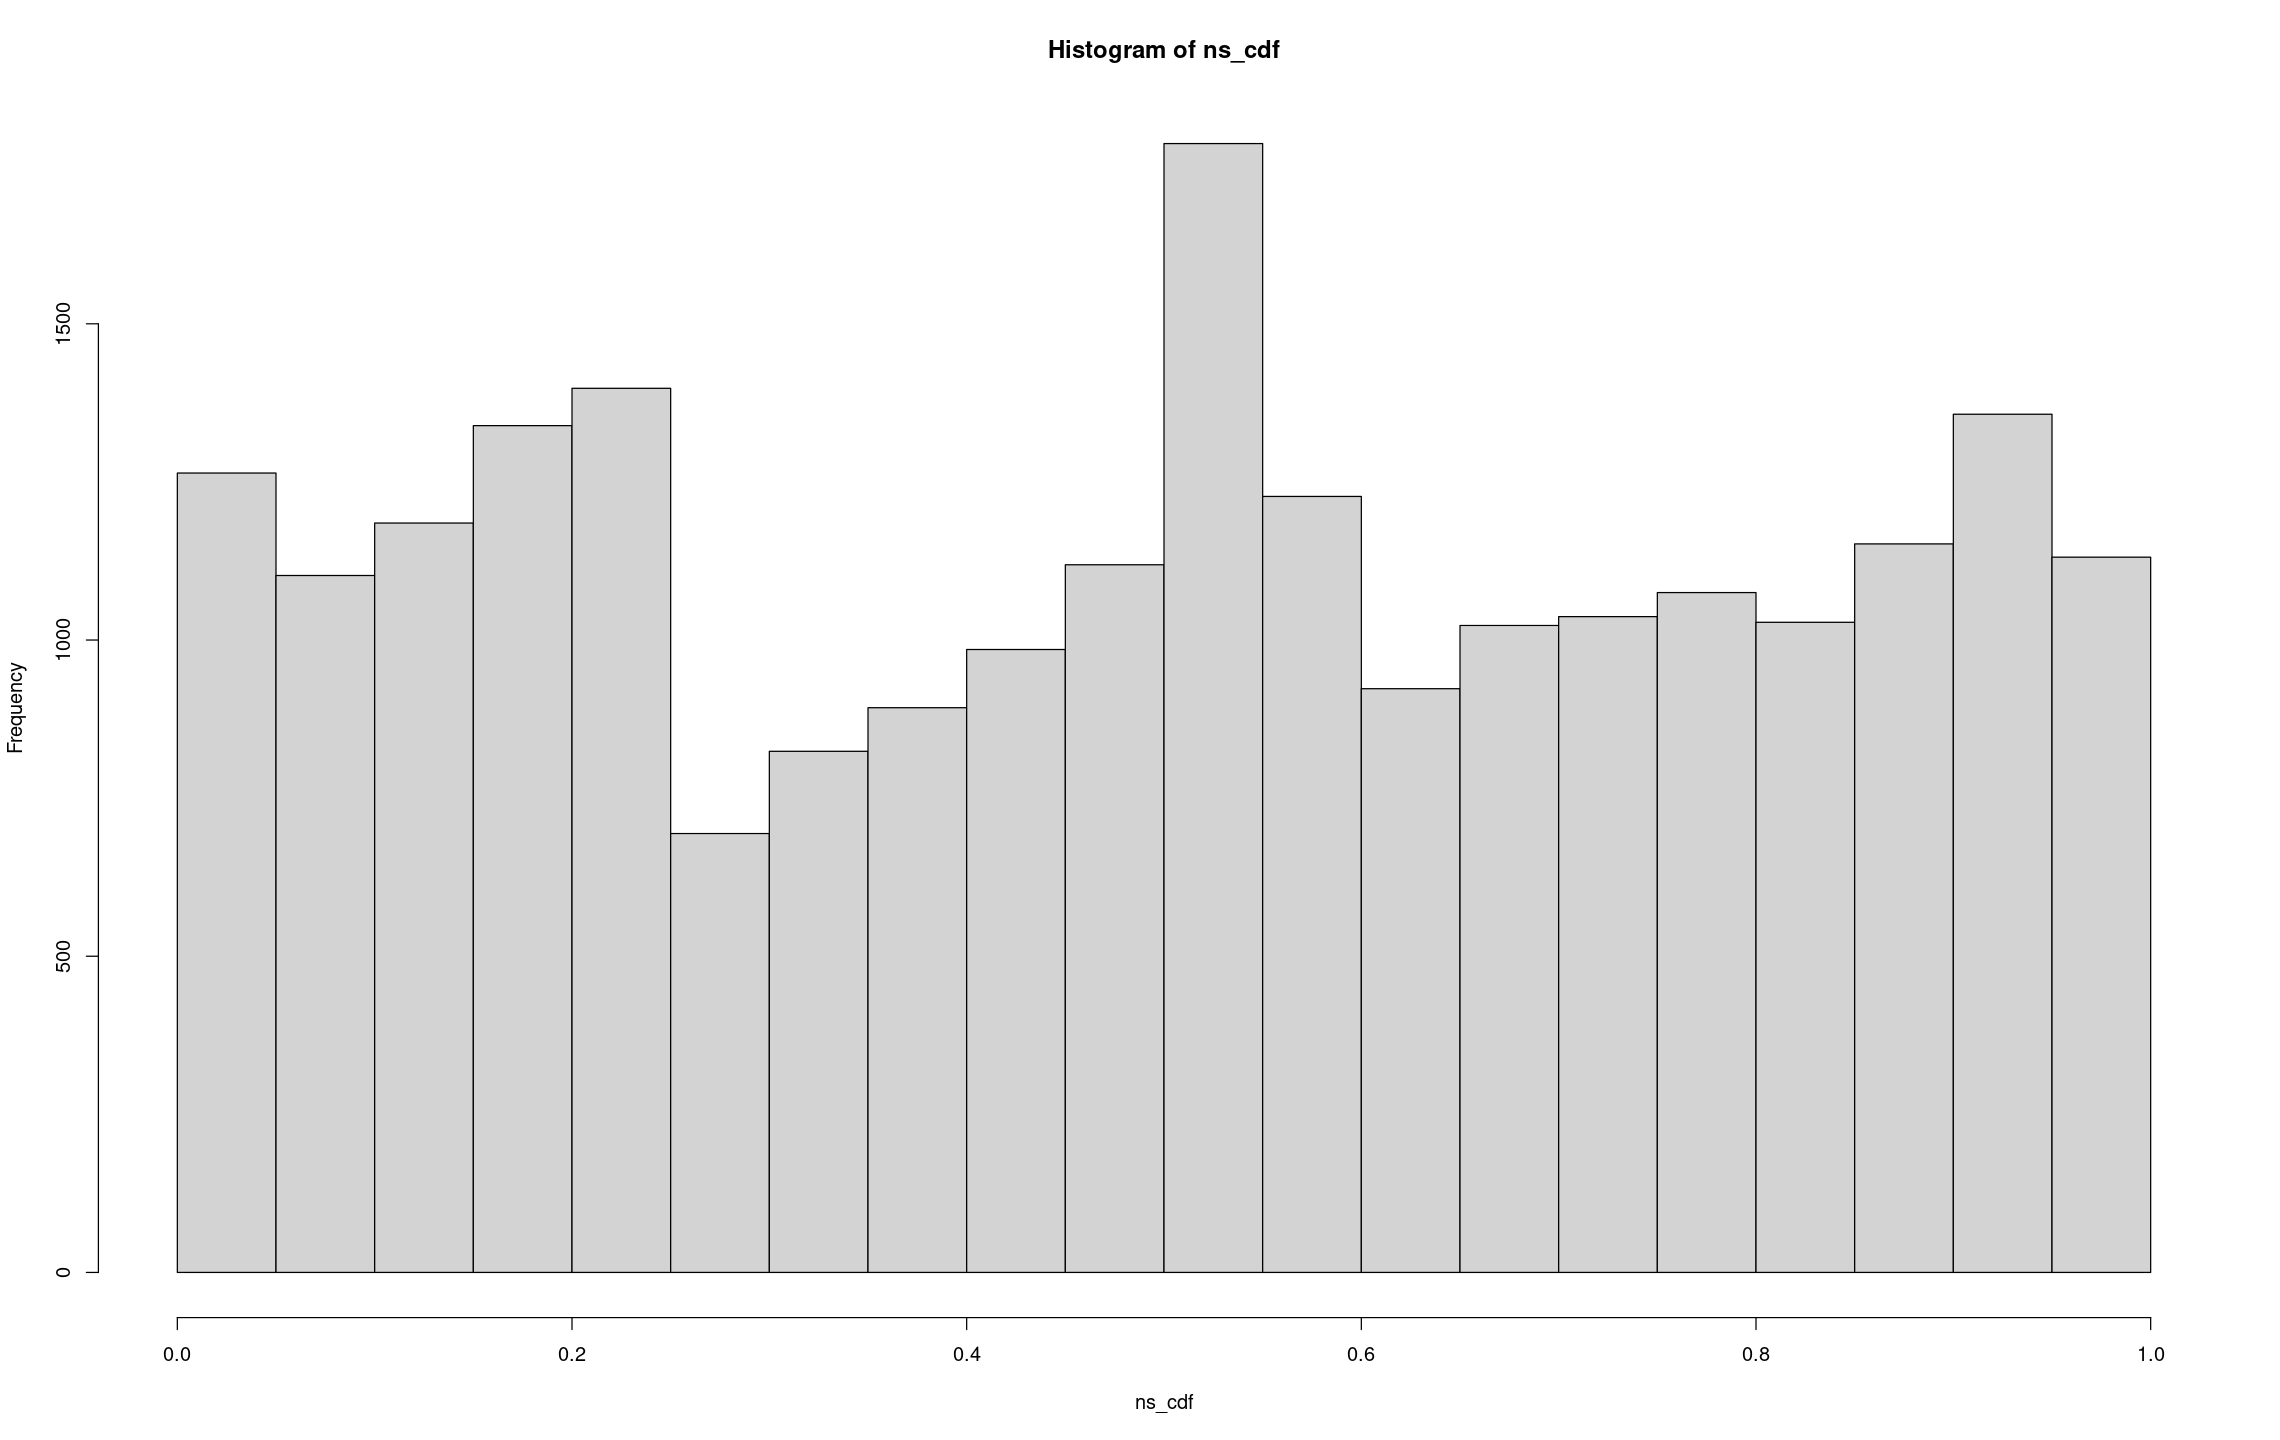

In [383]:
hist(ns_cdf)

## Quantiles

In [384]:
tail(data_covariates)

velocity_latitude,velocity_longitude,velocity,area,object
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-1.940983719e-12,7.435616186e-13,2.078533541e-12,0.5983367151,17
-1.363411577e-12,5.330692871e-13,1.463917345e-12,0.5661612699,18
-1.173312364e-12,4.772723125e-13,1.266669161e-12,0.6322046775,20
-1.267666481e-12,5.446311827e-13,1.379710634e-12,0.6057293744,20
-6.827273381e-13,3.380506526e-13,7.618365060e-13,0.6087681255,20
-4.829062301e-13,3.187162538e-13,5.786004473e-13,0.5587587651,20


In [396]:
new_data_covariates <- data.frame(velocity_latitude = -7*10^(-12),
                       velocity_longitude = 5*10^(-13),
                       velocity = 10^(-12),
                       area = 0.8,
                       object = 10)

new_data_covariates

velocity_latitude,velocity_longitude,velocity,area,object
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-7e-12,5e-13,1e-12,0.8,10


In [397]:
new_data_covariates_scaled <- get_standard_scaled_data(data_covariates, newdata = new_data_covariates)
new_data_covariates_scaled

velocity_latitude,velocity_longitude,velocity,area,object
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.1562570554,0.01067469925,-1.608122765,-0.3528645972,-2.098498172


In [398]:
ns_parameters <- sapply(cluster_models, function(model){
    get_ns_gev_model_parameters(model, new_data_covariates_scaled)
})

print(ns_parameters)

         [,1]          [,2]        
location 0.1559324018  0.6215876779
scale    0.08544904755 0.1795371308
shape    -0.2073158847 0.3163308429


In [399]:
ns_weights <- ns_gev_model$cluster_weights
print(ns_weights)

[1] 0.5372432456 0.4627567544


In [400]:
alpha <- 10^(-14)

In [401]:
alpha <- 1/(22542*1)

In [402]:
rl_geometric <- calculate_gev_mixture_model_inverse_cdf(p = 1 - alpha,
                                                   locations = as.numeric(ns_parameters["location", ]),
                                                   scales = as.numeric(ns_parameters["scale", ]),
                                                   shapes = as.numeric(ns_parameters["shape", ]),
                                                   weights = ns_weights,
                                                   iterations = 100,
                                                   kind = c("geometric", "arithmetic")[1])

print(rl_geometric)

[1] 10.64988669


In [403]:
rl_arithmetic <- calculate_gev_mixture_model_inverse_cdf(p = 1 - alpha,
                                                   locations = as.numeric(ns_parameters["location", ]),
                                                   scales = as.numeric(ns_parameters["scale", ]),
                                                   shapes = as.numeric(ns_parameters["shape", ]),
                                                   weights = ns_weights,
                                                   iterations = 100,
                                                   kind = c("geometric", "arithmetic")[2])

print(rl_arithmetic)

[1] 10.64980037
